In [32]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import math
def Base_10_to_n(X, n):
    X_dumy = X
    out = ''
    while X_dumy>0:
        out = str(X_dumy%n)+out
        X_dumy = int(X_dumy/n)
    return out

def count(spam, var, leng):
    found = 0
    for i in range(len(spam) - leng +1):
        if spam[i:(i+leng)] == var:
            found += 1
    return found
def Base_n_to_10(X,n):
    out = 0
    for i in range(1,len(str(X))+1):
        out += int(X[-i])*(n**(i-1))
    return out#int out
def Base_n_to_m(X, n, m):
    return Base_n_to_10(Base_10_to_n(X, n), m)
    

In [41]:
#ファイルの読み込み
file_name1 = 'B39 restraint R2'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xlsx')
file2 = pd.ExcelFile(file_name2+'.xlsx')
#time_file = open(file_name1 + '_' + file_name2 +'_time_data.csv', 'w')

time_leng = 10
pattern_leng = 2


sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

max_psth1 = 0
max_psth2 = 0

sum_pattern1 = 0
sum_pattern2 = 0

In [42]:
#ファイル1のデータカウント
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    #print(sheet_df1[i])
    sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    #sig1 = sig1 - sig1.mean()
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    #x = np.linspace(0, leng-1, leng)
    if (max(psth) > max_psth1) : 
        #pattern_count = np.append(pattern_count,  np.zeros((max(psth)+1) ** pattern_leng) - ((max_psth+1) ** pattern_leng) )
        max_psth1 = max(psth)
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    sum_pattern1 += (len(psth_pattern) - pattern_leng + 1)    

In [43]:
#ファイル2のデータカウント
for i, name in enumerate(sheet_names2):
    sheet_df2[i] = file2.parse(name)
    end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
    sig1 = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    if (max(psth) > max_psth2) : 
        max_psth2 = max(psth)
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    sum_pattern2 += (len(psth_pattern) - pattern_leng + 1)  

In [44]:
#ファイル1のパターンカウント
psth_count1 = np.zeros(((max_psth1 + 1) ** pattern_leng), dtype=int)
        
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    sig = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig[k : k+time_leng].sum()
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    
    for i in range((max_psth1 + 1) ** pattern_leng) : 
        pattern = Base_10_to_n(i, (max_psth1+1))
        psth_count1[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

print(psth_count1)
print(max_psth1)
print(sum_pattern1)

[30683   593     0     0   593  6246   139     0     0   139   327     3
     0     0     3     1]
3
38727


In [45]:
#ファイル2のパターンカウント
psth_count2 = np.zeros(((max_psth2 + 1) ** pattern_leng), dtype=int)
        
for i, name in enumerate(sheet_names2):
    sheet_df2[i] = file2.parse(name)
    end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
    sig = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig[k : k+time_leng].sum()
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    
    for i in range((max_psth2 + 1) ** pattern_leng) : 
        pattern = Base_10_to_n(i, (max_psth2+1))
        psth_count2[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

print(psth_count2)
print(max_psth2)
print(sum_pattern2)

[25958   984     0     0   984 10520   355     0     0   355   796     4
     0     0     4     2]
3
39962


In [46]:
#情報量の計算準備
if(max_psth1 >= max_psth2) : 
    max_psth = max_psth1
    min_psth = max_psth2
else : 
    max_psth = max_psth2
    min_psth = max_psth1

sum_pattern = sum_pattern1 + sum_pattern2
psth_count = psth_count1 + psth_count2
pattern_information = np.zeros(((max_psth + 1) ** pattern_leng))
print(max_psth)
print(sum_pattern)
print(psth_count)

3
78689
[56641  1577     0     0  1577 16766   494     0     0   494  1123     7
     0     0     7     3]


In [72]:
#情報量の計算
pattern_information = np.zeros(((min_psth + 1) ** pattern_leng))
x = np.zeros((max_psth + 1) ** pattern_leng)

for i in range((min_psth + 1) ** pattern_leng) :
    p1 = psth_count1[Base_n_to_m(i, max_psth1, min_psth)] / sum_pattern1
    p2 = psth_count2[Base_n_to_m(i, max_psth2, min_psth)] / sum_pattern2
    x[i]  = str(Base_10_to_n(i, min_psth)).zfill(pattern_leng)
    if (p1 != 0) and (p2 != 0) : 
        pattern_information[i] = p1 * math.log2(p1/p2)
        #print(p1 * math.log2(p1/p2))
    else :
        pattern_information[i] = 0
    # if (p2 != 0) :

print(pattern_information)
print(sum(pattern_information))

[ 2.27030081e-01 -1.04940982e-02  0.00000000e+00  0.00000000e+00
 -1.04940982e-02 -1.14001344e-01 -4.69271746e-03  0.00000000e+00
  0.00000000e+00 -4.69271746e-03 -1.04549209e-02 -2.86426879e-05
  0.00000000e+00  0.00000000e+00 -2.86426879e-05 -2.46523345e-05]
0.07211824654732478


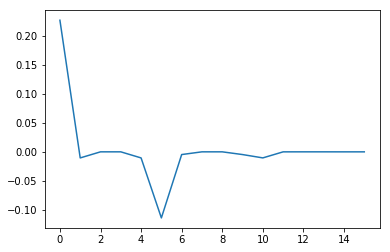

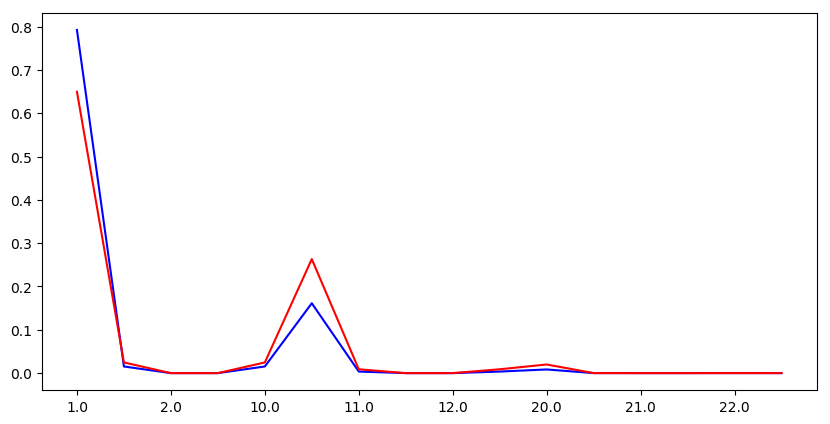

In [86]:
plt.plot(pattern_information)
plt.show()


fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.gca()
plt.plot(psth_count1/sum_pattern1, color="blue")
plt.plot(psth_count2/sum_pattern2, color="red")
#plt.set_xticklabels(x)
ax.set_xticklabels(x)
plt.savefig("./info_graph/" + str(pattern_leng) + ".png")